# Plotting KDEs and Ridgelines with matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from KDEpy import FFTKDE
import joypy

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)
rc('font', family='serif')

We will work with a data based on a study of perception of probability:

Each row represents a response to the question: "*What probability percentage would you assign to the phrase [...]?*"

The study was done by CIA on perception of probabilistic phrases. For more information, see the following references:
- [Critical Thinking For Strategic Intelligence](https://books.google.com.au/books?id=_X0FHYpHDzoC)
- [Github repository by Zonination](https://github.com/zonination/perceptions)
- [Recreation by Yan Holtz on Data2Viz](https://www.data-to-viz.com/story/OneNumOneCatSeveralObs.html)

In [2]:
data = pd.read_csv('../data/perception_of_probability.csv')
data.head()

,Almost Certainly,Highly Likely,Very Good Chance,Probable,Likely,Probably,We Believe,Better Than Even,About Even,We Doubt,Improbable,Unlikely,Probably Not,Little Chance,Almost No Chance,Highly Unlikely,Chances Are Slight
0,95.0,80,85,75,66,75,66,55.0,50,40,20.0,30,15.0,20,5.0,25,25
1,95.0,75,75,51,75,51,51,51.0,50,20,49.0,25,49.0,5,5.0,10,5
2,95.0,85,85,70,75,70,80,60.0,50,30,10.0,25,25.0,20,1.0,5,15
3,95.0,85,85,70,75,70,80,60.0,50,30,10.0,25,25.0,20,1.0,5,15
4,98.0,95,80,70,70,75,65,60.0,50,10,50.0,5,20.0,5,1.0,2,10


## Method I - basic and flexible
- Extenral KDE estimator
- Basic matplotlib

This allows using our own KDE method, but requires us to do most parts manually.
This is suitable when dataset is large, or very specialized/customized visualization is needed.

In [3]:
certainly = data['Almost Certainly'].values
kde_certainly = FFTKDE(kernel='gaussian', bw='silverman').fit(certainly).evaluate()

even = data['About Even'].values
kde_even = FFTKDE(kernel='gaussian', bw='silverman').fit(even).evaluate()

nochance = data['Almost No Chance'].values
kde_nochance = FFTKDE(kernel='gaussian', bw='silverman').fit(nochance).evaluate()

/home/arash/anaconda3/envs/bayes/lib/python3.10/site-packages/KDEpy/bw_selection.py:282: UserWarning: Silverman's rule failed. Too many idential values. Setting bw = 1.0321341385332972
  warnings.warn(


Note the failure of the silverman method above, which forced the algorithm to choose a different bandwidth.

Now onto plotting:

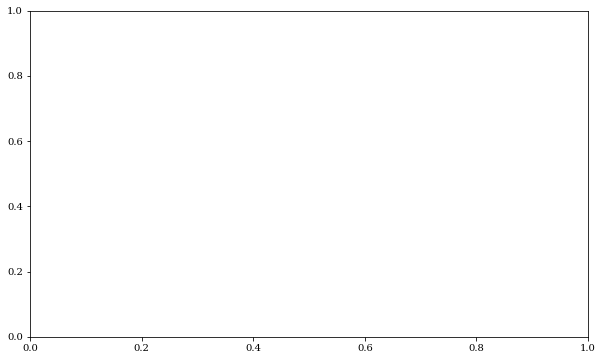

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)



We can improve the aesthetics now:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


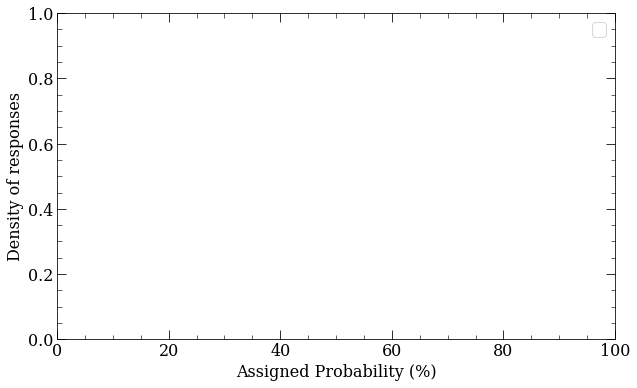

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
###
# Add your code here






###
ax.legend(fontsize=18)
ax.set_xlabel('Assigned Probability (%)',fontsize=16)
ax.set_ylabel('Density of responses',fontsize=16)

ax.set_xlim(0,100)
ax.set_ylim(0)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=9)
ax.tick_params(axis='both', which='minor', length=4.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Method II - Pandas functions

Pandas has a set of quick plotting functions relying on matplotlib, we can exploit them to make our plots faster.

In the case of KDEs, note that the Pandas implementation (like many other packages) relies on `scipy` for estimation.

Make a KDE plot of the dataframe:

In [6]:
# Add here!



Let's create a slice with just the three columns of `Almost Certainly`,`About Even`,`Almost No Chance` and make a kde of those.

In [7]:
# Add here!



Alright, so this function, returns a matplotlib `axes`. We can exploit this to tweat this function as we like:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


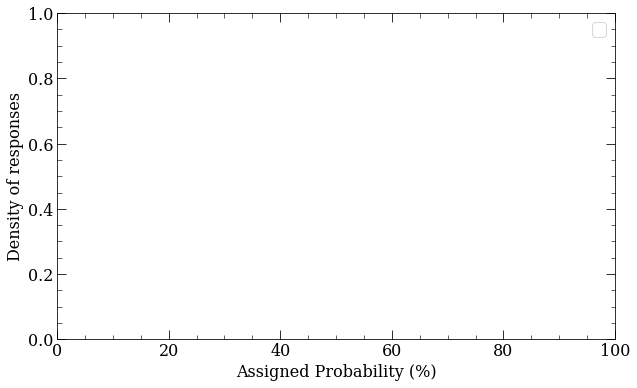

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
###
# Add here!



###
ax.legend(fontsize=18)
ax.set_xlabel('Assigned Probability (%)',fontsize=16)
ax.set_ylabel('Density of responses',fontsize=16)

ax.set_xlim(0,100)
ax.set_ylim(0)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=9)
ax.tick_params(axis='both', which='minor', length=4.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Ridgeline

As we saw above, the KDE plot for all the columns makes it difficult to interpret. 

In these cases, a ridgeline plot is helpful. Here we use the package `joypy` to make this plot.